In [328]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [329]:
df = pd.read_csv("titanic/train.csv")
# df["Cabin"].sort_values().unique()
df["Sex"] = df["Sex"].apply(lambda x: 1 if x == "male" else 0)
df["Name"] = df["Name"].apply(lambda x: x.split(",")[0])
X_train = df[["Pclass","Sex","Age","SibSp","Parch","Fare","Embarked","Survived"]]
X_train["Age"].fillna(np.mean(X_train["Age"].values))
X_train["Embarked"].unique()
X_train = X_train[X_train["Embarked"].notna()]
X_train["Age"] = X_train["Age"].fillna(np.mean(X_train["Age"]))
X_train["Embarked"] = X_train["Embarked"].apply(lambda x: 0 if x == "S" else 1 if x == "C" else 2)
X_train = X_train.astype("float32")
Y_train = X_train["Survived"]
X_train.drop("Survived", axis = 1, inplace=True)
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3.0,1.0,22.000000,1.0,0.0,7.250000,0.0
1,1.0,0.0,38.000000,1.0,0.0,71.283302,1.0
2,3.0,0.0,26.000000,0.0,0.0,7.925000,0.0
3,1.0,0.0,35.000000,1.0,0.0,53.099998,0.0
4,3.0,1.0,35.000000,0.0,0.0,8.050000,0.0
...,...,...,...,...,...,...,...
886,2.0,1.0,27.000000,0.0,0.0,13.000000,0.0
887,1.0,0.0,19.000000,0.0,0.0,30.000000,0.0
888,3.0,0.0,29.642092,1.0,2.0,23.450001,0.0
889,1.0,1.0,26.000000,0.0,0.0,30.000000,1.0


In [330]:
df = pd.read_csv("titanic/test.csv")
# df["Cabin"].sort_values().unique()
df["Sex"] = df["Sex"].apply(lambda x: 1 if x == "male" else 0)
df["Name"] = df["Name"].apply(lambda x: x.split(",")[0])
X_test = df[["Pclass","Sex","Age","SibSp","Parch","Fare","Embarked"]]
X_test["Age"].fillna(np.mean(X_test["Age"].values))
X_test["Embarked"].unique()
X_test = X_test[X_test["Embarked"].notna()]
X_test["Age"] = X_test["Age"].fillna(np.mean(X_test["Age"]))
X_test["Embarked"] = X_test["Embarked"].apply(lambda x: 0 if x == "S" else 1 if x == "C" else 2)
X_test = X_test.astype("float32")
X_test.fillna(np.mean(X_test["Fare"]), inplace=True)
X_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3.0,1.0,34.500000,0.0,0.0,7.829200,2.0
1,3.0,0.0,47.000000,1.0,0.0,7.000000,0.0
2,2.0,1.0,62.000000,0.0,0.0,9.687500,2.0
3,3.0,1.0,27.000000,0.0,0.0,8.662500,0.0
4,3.0,0.0,22.000000,1.0,1.0,12.287500,0.0
...,...,...,...,...,...,...,...
413,3.0,1.0,30.272591,0.0,0.0,8.050000,0.0
414,1.0,0.0,39.000000,0.0,0.0,108.900002,1.0
415,3.0,1.0,38.500000,0.0,0.0,7.250000,0.0
416,3.0,1.0,30.272591,0.0,0.0,8.050000,0.0


In [331]:
df = pd.read_csv("titanic/gender_submission.csv")
df.drop("PassengerId", axis = 1, inplace = True)
Y_test = df["Survived"]

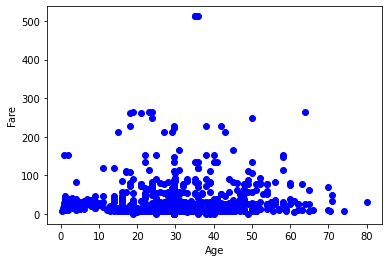

In [332]:
plt.scatter(X_train["Age"].to_numpy(),X_train["Fare"].to_numpy(), color="blue")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.show()

In [333]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [334]:
st_x = StandardScaler()
X_train = st_x.fit_transform(X_train)
X_test = st_x.transform(X_test)

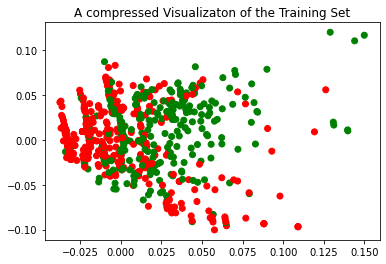

In [335]:
# The visualization is perfromed after PCA compression to 2 features from 7 features.
sigma = (1/len(X_train))*np.matmul(X_train,X_train.T)
u, s, vh = np.linalg.svd(sigma, full_matrices=True)
X1 = u[:,0]
X2 = u[:,1]

plt.scatter(X1,X2,c = Y_train.map({1:"green",0:"red"}))
plt.title("A compressed Visualizaton of the Training Set")
plt.show()

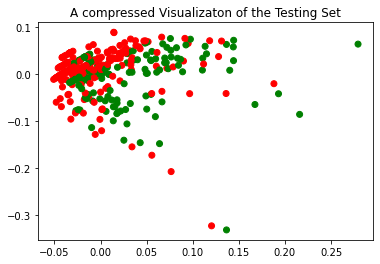

In [336]:
# The visualization is perfromed after PCA compression to 2 features from 7 features.
sigma = (1/len(X_test))*np.matmul(X_test,X_test.T)
u, s, vh = np.linalg.svd(sigma, full_matrices=True)
X1 = u[:,0]
X2 = u[:,1]

plt.scatter(X1,X2,c = Y_test.map({1:"green",0:"red"}))
plt.title("A compressed Visualizaton of the Testing Set")
plt.show()

In [337]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver="liblinear", random_state=0)
model.fit(X_train, Y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [338]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)
accuracy = np.mean(y_pred == Y_test.ravel())*100
conf_mtx = confusion_matrix(Y_test,y_pred)
print(f"The accuracy of the model is : {accuracy}")

The accuracy of the model is : 94.73684210526315


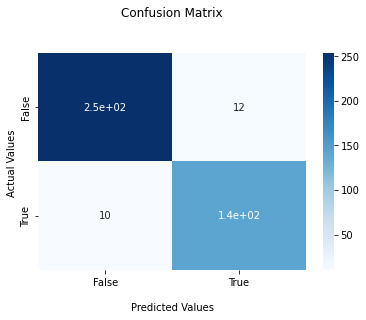

In [339]:
import seaborn as sns
ax = sns.heatmap(conf_mtx, annot=True, cmap='Blues')
ax.set_title('Confusion Matrix\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

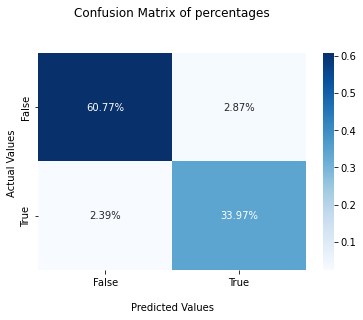

In [340]:
ax = sns.heatmap((conf_mtx/np.sum(conf_mtx)), annot=True, cmap='Blues', fmt = ".2%")
ax.set_title('Confusion Matrix of percentages\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

Text(0.5, 1.0, 'Original')

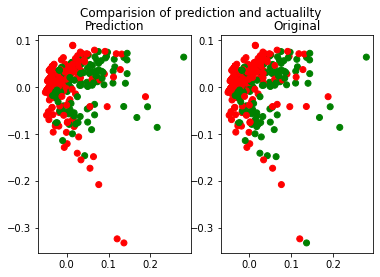

In [341]:
fig, (ax1,ax2) = plt.subplots(1,2)
fig.suptitle("Comparision of prediction and actualilty")
sigma = (1/len(X_test))*np.matmul(X_test,X_test.T)
u, s, vh = np.linalg.svd(sigma, full_matrices=True)
X1 = u[:,0]
X2 = u[:,1]
Y_pred = pd.Series(y_pred)
ax1.scatter(X1,X2,c = Y_pred.map({1:"green",0:"red"}))
ax1.set_title("Prediction")

sigma = (1/len(X_test))*np.matmul(X_test,X_test.T)
u, s, vh = np.linalg.svd(sigma, full_matrices=True)
X1 = u[:,0]
X2 = u[:,1]
ax2.scatter(X1,X2,c = Y_test.map({1:"green",0:"red"}))
ax2.set_title("Original")